In [250]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import UnitaryGate
from scipy.linalg import block_diag
from qiskit import transpile

import numpy as np


# Mini Project #2
## Noah Lanier - Boolean Quantum ROM
---
Task: Write a Qiskit function that takes a boolean function $f:\mathbb{F}_2^n\rightarrow \mathbb{F}_2$ and outputs a circuit, $U$, such that
\\[U|x\rangle_n|0\rangle_1 \, = \, |x\rangle_n|f(x)\rangle_1.\\]

The construction may use any number of ancillas and any controlled multi-qubit gates and the built-in version of the Quantum Fourier Transform (and its inverse) if needed.
***

We will be following the ideas of the website [qubit.guide](https://qubit.guide/10.1-quantum-boolean-function-evaluation). The main take-away is that we can build an $(2^n\times 2^n)$ block diagonal matrix with $(2\times 2)$ blocks of either $I$ or $X$ on the diagonal. Mathematically we can write this matrix as 
\\[U_f=\sum_{x\in \mathbb{F}_2^n} |x\rangle \langle x| \otimes X^{f(x)}.\\]
If we pick some $y\in \mathbb{F}_n^2$, then applying $U_f$ to $|y\rangle_n |0\rangle_1$ gives
$$\begin{align*}
U_f |y\rangle_n |0\rangle_1&=\left(\sum_{x\in \mathbb{F}_2^n} |x\rangle \langle x| \otimes X^{f(x)}\right)(|y\rangle_n |0\rangle_1)\\
&=\sum_{x\in \mathbb{F}_2^n}\delta_{x,y} |x\rangle_n \otimes X^{f(x)}|0\rangle_1\\
&=|y\rangle_n|f(x)\rangle_1
\end{align*}$$
as desired. 

Because the block matrix will only have $I$ or $X$ on the diagonal, we only need to account for the $x\in \mathbb{F}_n^2$ that give $f(x)=1$. Rather than asking for bit-strings, we will ask for a list $\{x_i\}$ with $x_i\in [0,2^n -1]\cap \mathbb{Z}$. For example, for $n=3$ and given the list $\{0,1,7\}$ (note that the list can have a size anywhere from $0$ to $2^n-1$) we would create the block matrix given below.

In [221]:
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])

# Create the block diagonal matrix
block_matrix = block_diag(X, X, I, I, I, I, X)

print(block_matrix)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


We now will ask, as input, for arbitrary $n$ and the list $\{x_i\}$ with $x_i\in [0,2^n-1]\cap \mathbb{Z}$ that defines $f$. We will continue with our same example as above, inputing $n=3$ and the list $\{0,1,7\}$.

In [224]:
list = []

# Get n
n = int(input("Enter n: "))

# Get the number of elements in the list
k = int(input("Enter the number of elements in the list defining f: "))

# Append elements to the list
for i in range(k):
    element = input(f"Enter element {i+1}: ")
    list.append(element)

print("List:", list)

Enter n:  3
Enter the number of elements in the list defining f:  3
Enter element 1:  0
Enter element 2:  1
Enter element 3:  7


List: ['0', '1', '7']


Now, we'll take these input values and define the $(2^n\times 2^n)$ diagonal block matrix corresponding to $U_f$.

In [229]:
matrices = []
int_list = [int(item) for item in list]
for i in range(2**n):
    if i in int_list:
        matrices.append(X)
    else:
        matrices.append(I)
result = block_diag(*matrices)
print(result)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


Next, we need to make a circuit out of this diagonal block matrix. First, we will make our ```result``` matrix a gate using the ```Operator``` class from ```qiskit.quantum_info```. Recall, our example class has $n=3$ control qubits and we always have $1$ target qubit.

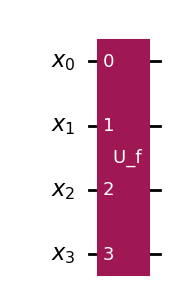

In [245]:
U_f = UnitaryGate(result, label="U_f ")


qr = QuantumRegister(size = n+1,name = "x")
qc = QuantumCircuit(qr)

qc.append(U_f,qr[:])
qc.draw("mpl")

And finally, we need to decompose this $4$-qubit unitary into arbitrary $1$-qubit and CNOT gates which gives the following:

[[ 0.-0.j  1.-0.j  0.+0.j  0.-0.j -0.-0.j -0.+0.j -0.+0.j  0.-0.j -0.-0.j
   0.+0.j  0.+0.j  0.-0.j -0.-0.j  0.+0.j  0.+0.j -0.+0.j]
 [ 1.-0.j -0.-0.j -0.+0.j -0.-0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j
  -0.+0.j -0.+0.j  0.+0.j -0.+0.j  0.-0.j -0.-0.j  0.+0.j]
 [ 0.-0.j -0.-0.j -0.+0.j  1.-0.j  0.-0.j  0.-0.j -0.+0.j  0.+0.j -0.-0.j
  -0.-0.j -0.+0.j  0.-0.j  0.+0.j -0.-0.j  0.-0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.+0.j  0.-0.j  0.-0.j -0.-0.j -0.-0.j  0.-0.j
  -0.+0.j  0.+0.j  0.+0.j -0.-0.j -0.+0.j -0.+0.j -0.-0.j]
 [ 0.+0.j  0.-0.j -0.-0.j -0.-0.j  1.-0.j  0.+0.j  0.+0.j  0.+0.j -0.-0.j
   0.-0.j -0.+0.j  0.+0.j -0.+0.j  0.-0.j  0.-0.j -0.+0.j]
 [-0.+0.j  0.+0.j -0.+0.j -0.-0.j -0.+0.j  1.-0.j  0.-0.j -0.+0.j  0.-0.j
  -0.+0.j -0.-0.j  0.-0.j  0.+0.j -0.+0.j -0.-0.j -0.-0.j]
 [-0.+0.j  0.-0.j  0.-0.j -0.+0.j  0.+0.j -0.-0.j  1.-0.j  0.+0.j  0.-0.j
  -0.+0.j -0.+0.j  0.-0.j -0.+0.j -0.+0.j  0.-0.j -0.+0.j]
 [-0.+0.j -0.+0.j  0.-0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j  1.-0.j -0.

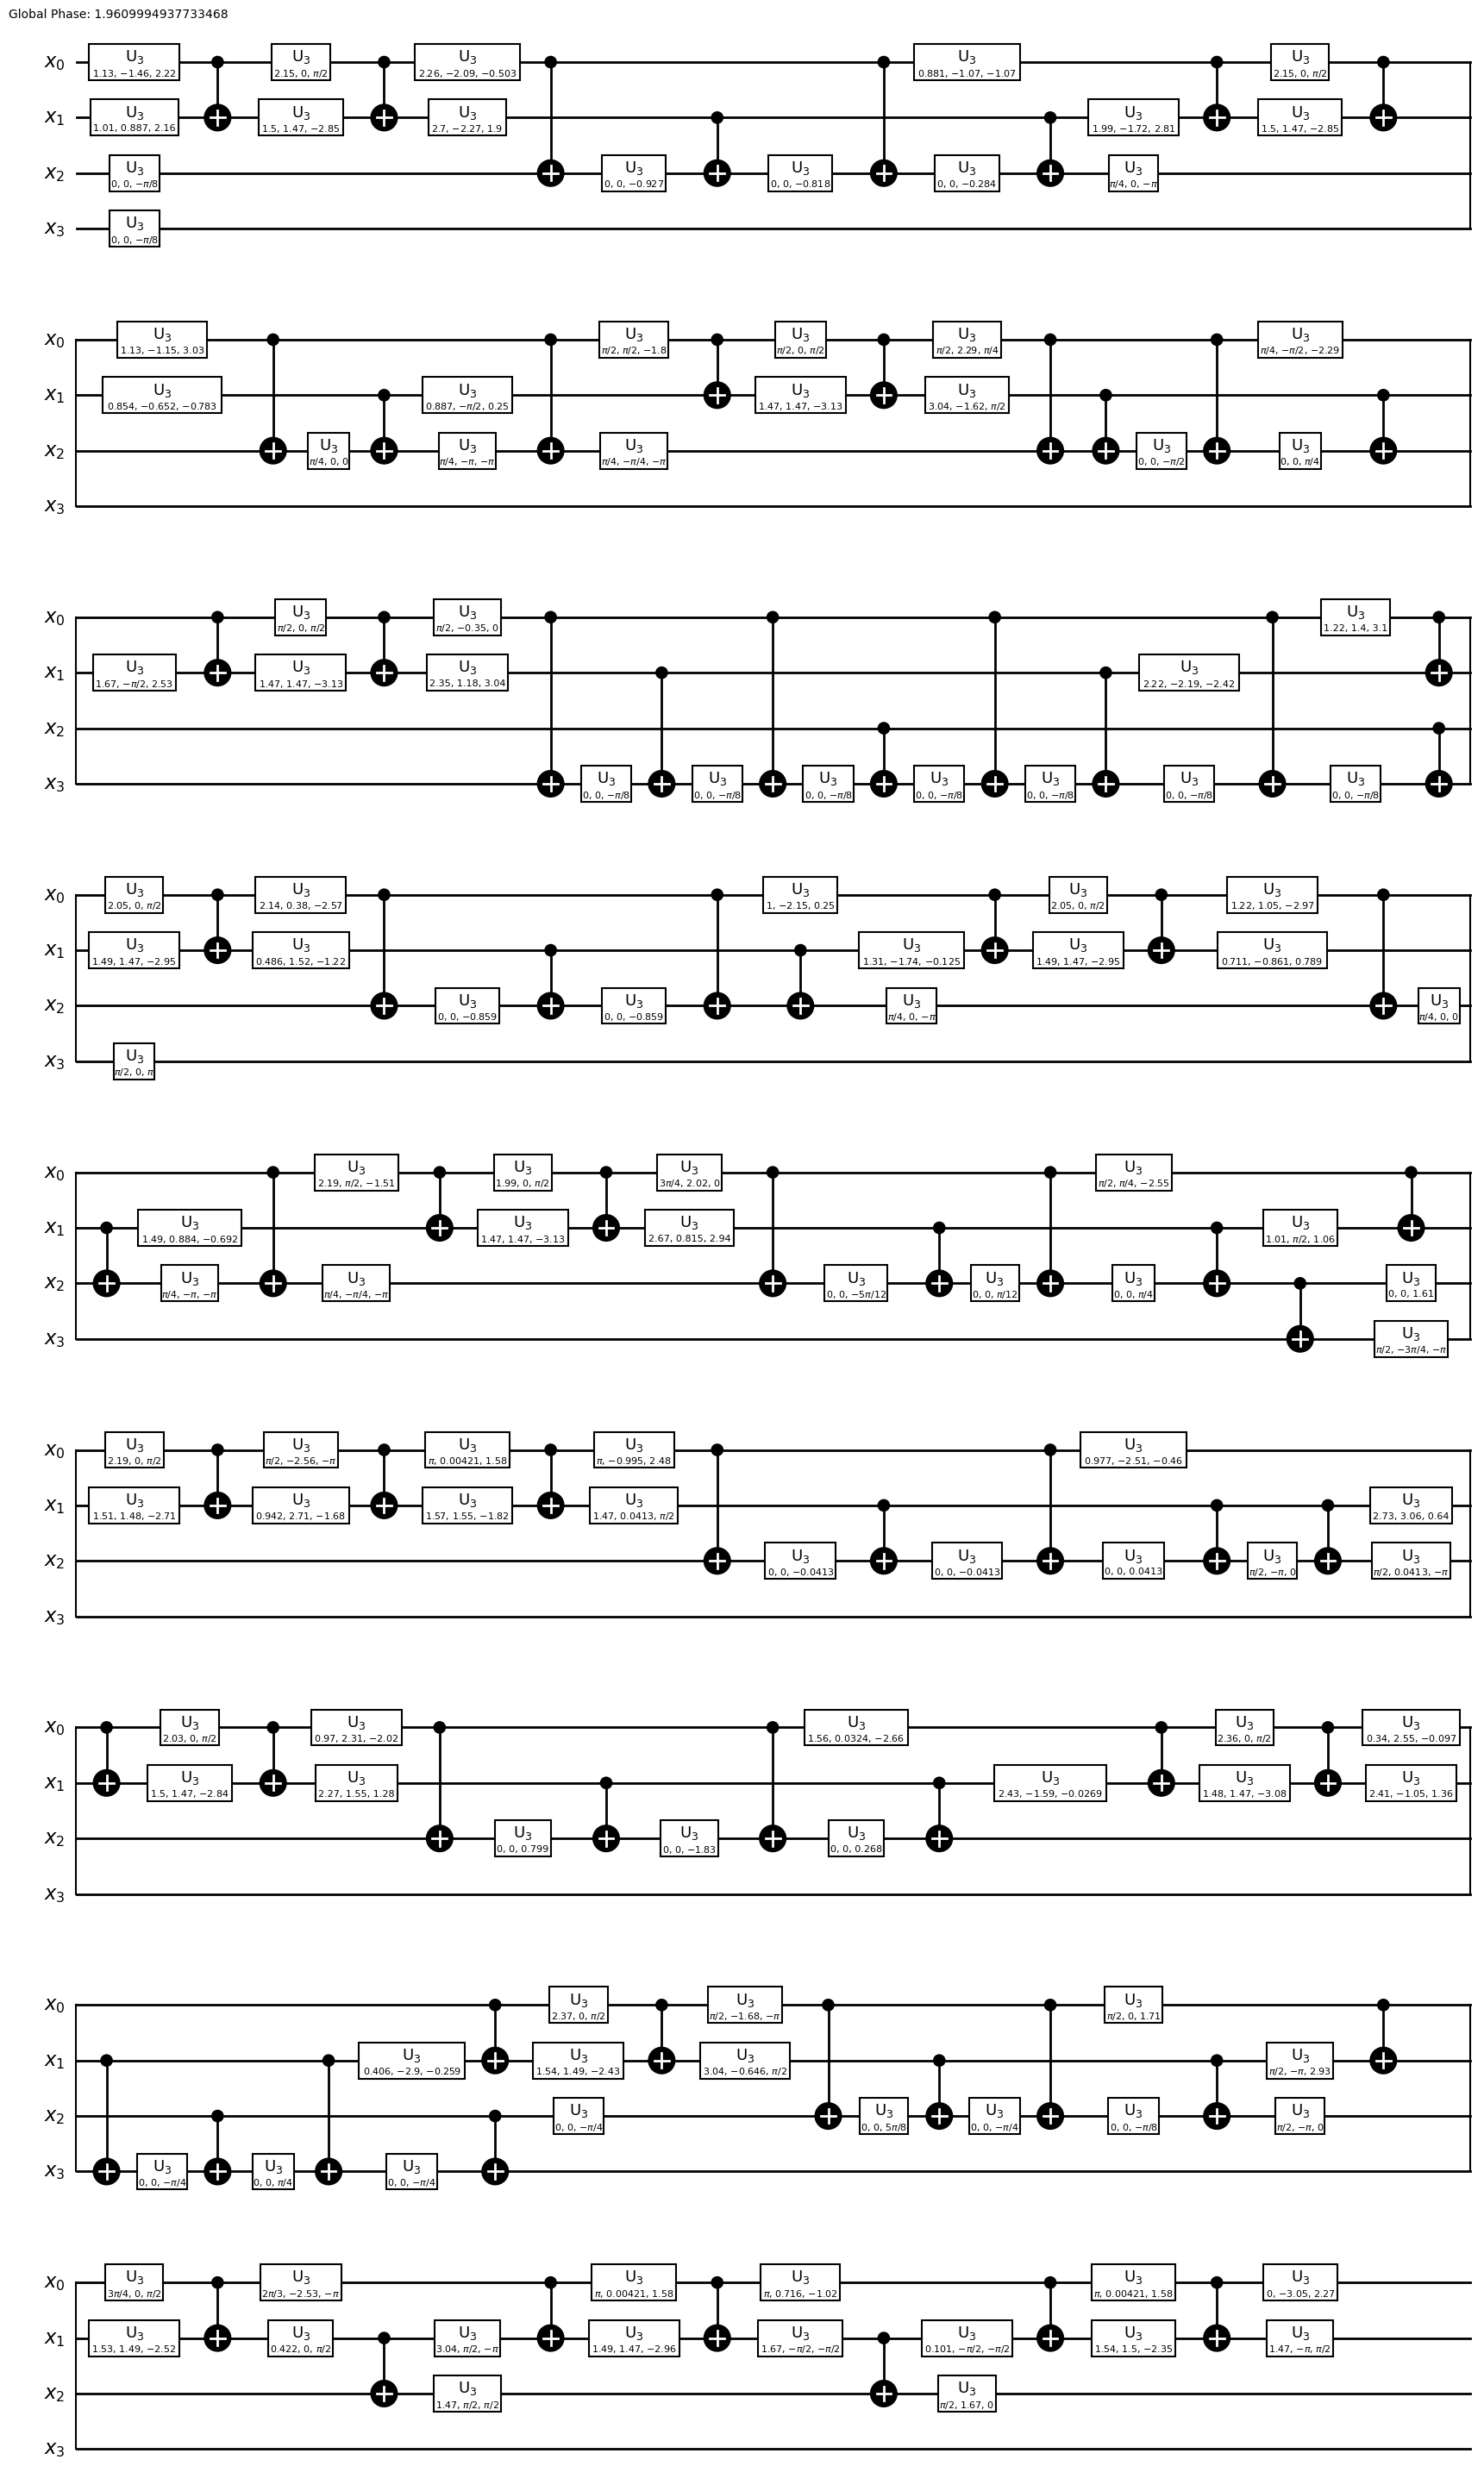

In [262]:
decomposed_qc = transpile(qc, basis_gates=['u3', 'cx'])

print(np.round(Operator(decomposed_qc).data,4))
decomposed_qc.draw(output="mpl", style="bw")